In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from initials import generate_u0
from FDM import HeatEquation

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
images = []

for i in range(2):
    for j in range(3):
        u0 = generate_u0(128, 128, 5)
        im = axes[i][j].imshow(u0, cmap='RdPu')
        axes[i][j].invert_yaxis()
        images.append(im)

# Find global min/max for consistent colorbar
vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)

# Update all images to use same scale
for im in images:
    im.set_clim(vmin, vmax)

# Add single colorbar
fig.colorbar(images[0], ax=axes.ravel().tolist(), location='right', shrink=0.8)
plt.show()

In [6]:
solver = HeatEquation()
tmax = 1

In [18]:
u = solver.anim_solve(u0, tmax)

Solving Heat Equation: 100%|█████████████| 3277/3277 [00:00<00:00, 13531.82it/s]


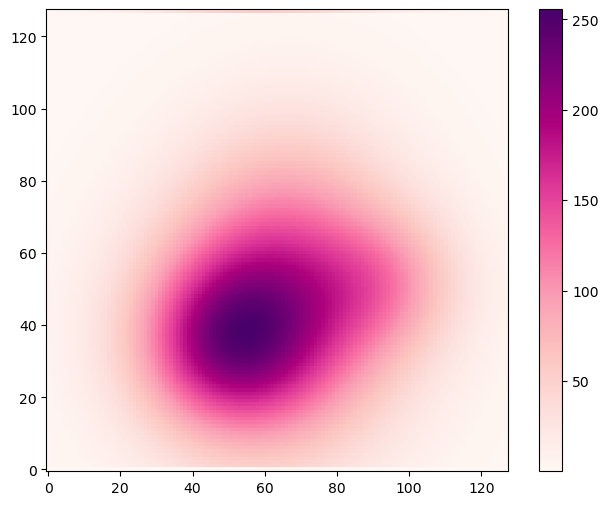

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
vmin = u.min()
vmax = u.max()

# Initial plot to establish the mappable for colorbar
im = ax.imshow(u[0], cmap='RdPu', vmin=vmin, vmax=vmax)
ax.invert_yaxis()
plt.colorbar(im)

def animate(frame):
    im.set_array(u[frame])
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=len(u), 
                             interval=50, blit=True)

In [22]:
HTML(anim.to_jshtml())